## Accessing yt methods 

A subset of methods available from the yt API are directly accessible when using `yt_xarray`. 

### Plotting methods 

Currently, the following plotting methods are available: 


* `SlicePlot`
* `ProjectionPlot`
* `PhasePlot`
* `ProfilePlot`

When loading an xarray dataset:

In [1]:
from yt_xarray.sample_data import load_random_xr_data
import yt_xarray 

fields = {'temperature': ('x', 'y', 'z'), 'pressure': ('x', 'y', 'z')}
dims = {'x': (0,1,15), 'y': (0, 1, 10), 'z': (0, 1, 15)}
ds = load_random_xr_data(fields, dims, length_unit='m')

The methods will be available under the `yt` accessor, for example `ds.yt.SlicePlot` will create a slice normal to the supplied axis name for a given field:

yt_xarray : [INFO ] 2024-01-08 14:43:53,235:  Inferred geometry type is cartesian. To override, use ds.yt.set_geometry
yt_xarray : [INFO ] 2024-01-08 14:43:53,245:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2024-01-08 14:43:53,245:      Cartesian geometry on uniform grid: yt_xarray will not interpolate.
yt : [INFO     ] 2024-01-08 14:43:53,301 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-01-08 14:43:53,301 Parameters: domain_dimensions         = [15 10 15]
yt : [INFO     ] 2024-01-08 14:43:53,302 Parameters: domain_left_edge          = [-0.03571429 -0.05555556 -0.03571429]
yt : [INFO     ] 2024-01-08 14:43:53,302 Parameters: domain_right_edge         = [1.03571429 1.05555556 1.03571429]
yt : [INFO     ] 2024-01-08 14:43:53,302 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-01-08 14:43:53,407 xlim = -0.055556 1.055556
yt : [INFO     ] 2024-01-08 14:43:53,407 ylim = -0.035714 1.035714
yt : [INFO     ] 202


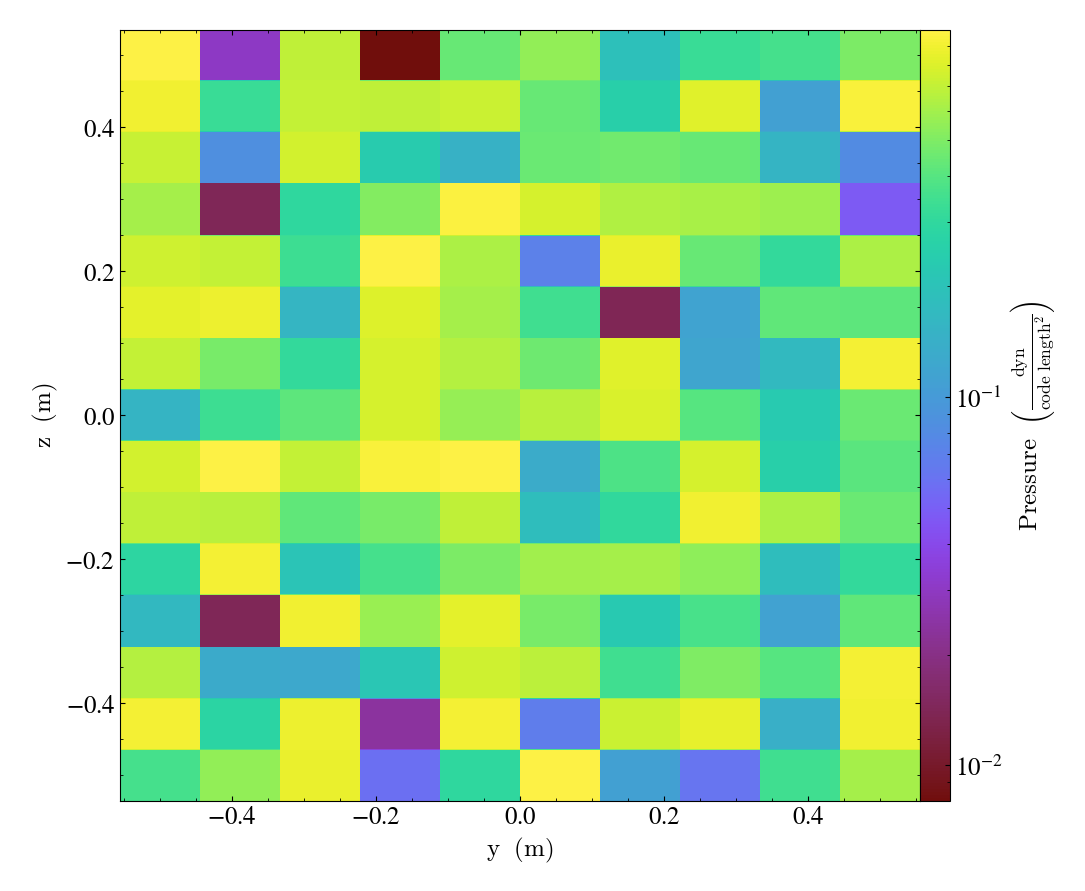

In [2]:
ds.yt.SlicePlot('x', 'pressure')

Importantly, all of these methods will operate on the full range of data avaialable. Most yt methods accept optional data selector objects to make plots for subsets of data without loading the full dataset. To take advantage of that, you'll want to first create a yt dataset object with `ds.yt.load_grid` and then use the standard `yt` API. 

`ProjectionPlot` calculates a projection over the provided normal access.  

yt_xarray : [INFO ] 2024-01-08 14:43:54,390:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2024-01-08 14:43:54,391:      Cartesian geometry on uniform grid: yt_xarray will not interpolate.
yt : [INFO     ] 2024-01-08 14:43:54,433 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-01-08 14:43:54,434 Parameters: domain_dimensions         = [15 10 15]
yt : [INFO     ] 2024-01-08 14:43:54,434 Parameters: domain_left_edge          = [-0.03571429 -0.05555556 -0.03571429]
yt : [INFO     ] 2024-01-08 14:43:54,435 Parameters: domain_right_edge         = [1.03571429 1.05555556 1.03571429]
yt : [INFO     ] 2024-01-08 14:43:54,435 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-01-08 14:43:54,516 Projection completed
yt : [INFO     ] 2024-01-08 14:43:54,516 xlim = -0.055556 1.055556
yt : [INFO     ] 2024-01-08 14:43:54,517 ylim = -0.035714 1.035714
yt : [INFO     ] 2024-01-08 14:43:54,518 xlim = -0.055556 1.055556
yt : [INFO


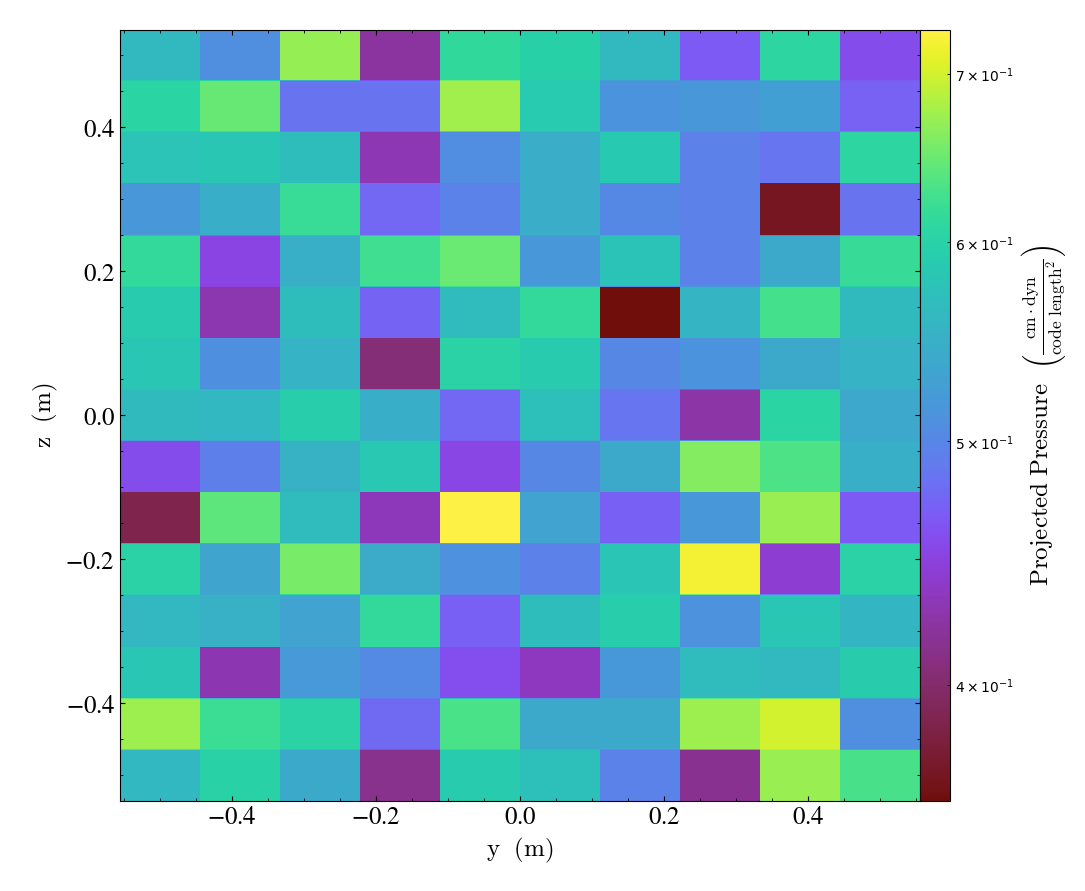

In [3]:
ds.yt.ProjectionPlot('x', 'pressure')

The accumulated value is controlled by the `method` arguement (see the `yt.AxisAlignedProjectionPlot` docstring for a full description of the other keyword arguments): 
```
method : string
    The method of projection.  Valid methods are:

    "integrate" with no weight_field specified : integrate the requested
    field along the line of sight.

    "integrate" with a weight_field specified : weight the requested
    field by the weighting field and integrate along the line of sight.

    "max" : pick out the maximum value of the field in the line of sight.
    "min" : pick out the minimum value of the field in the line of sight.

    "sum" : This method is the same as integrate, except that it does not
    multiply by a path length when performing the integration, and is
    just a straight summation of the field along the given axis. WARNING:
    This should only be used for uniform resolution grid datasets, as other
    datasets may result in unphysical images.
```


The other visualization methods available at present are binned-statistic plots. `ProfilePlot` bins a single variable and finds values (or weighted-values) of a second variable within those bins:

yt_xarray : [INFO ] 2024-01-08 14:43:54,996:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2024-01-08 14:43:54,997:      Cartesian geometry on uniform grid: yt_xarray will not interpolate.
yt : [INFO     ] 2024-01-08 14:43:55,038 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-01-08 14:43:55,039 Parameters: domain_dimensions         = [15 10 15]
yt : [INFO     ] 2024-01-08 14:43:55,039 Parameters: domain_left_edge          = [-0.03571429 -0.05555556 -0.03571429]
yt : [INFO     ] 2024-01-08 14:43:55,040 Parameters: domain_right_edge         = [1.03571429 1.05555556 1.03571429]
yt : [INFO     ] 2024-01-08 14:43:55,041 Parameters: cosmological_simulation   = 0



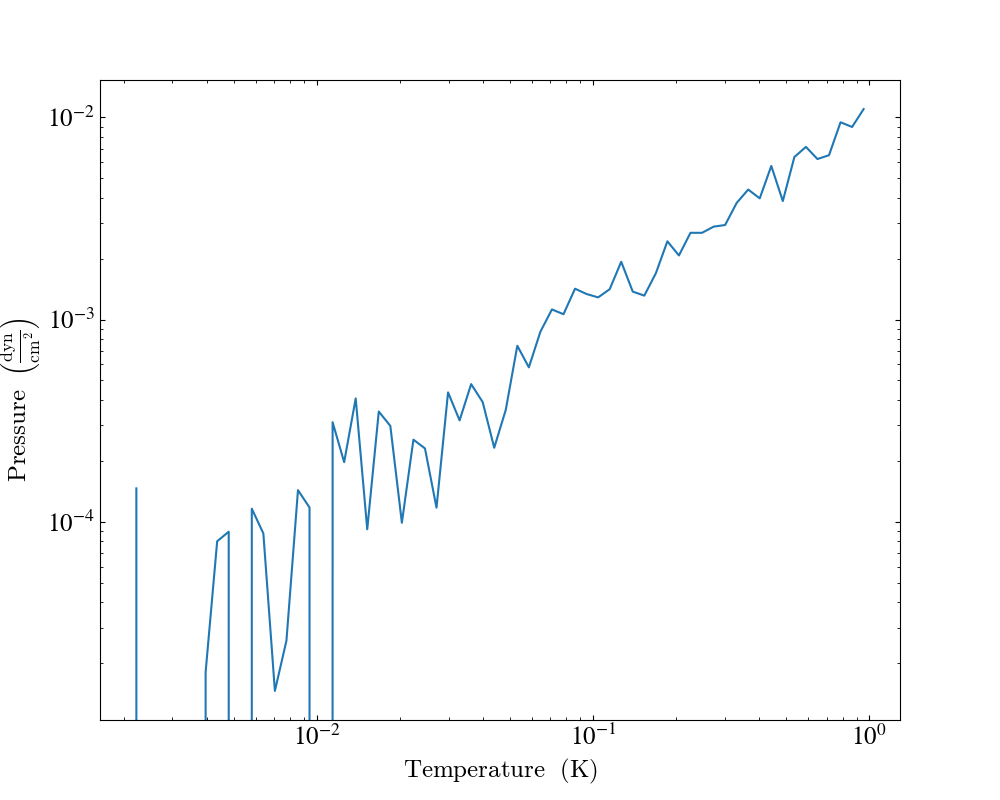

In [4]:
ds.yt.ProfilePlot('temperature', 'pressure')

`PhasePlot` instead bins 2 variables and then finds values (or weighted-values) of a 3rd variable within those bins:

yt_xarray : [INFO ] 2024-01-08 14:43:55,474:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2024-01-08 14:43:55,475:      Cartesian geometry on uniform grid: yt_xarray will not interpolate.
yt : [INFO     ] 2024-01-08 14:43:55,510 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-01-08 14:43:55,511 Parameters: domain_dimensions         = [15 10 15]
yt : [INFO     ] 2024-01-08 14:43:55,512 Parameters: domain_left_edge          = [-0.03571429 -0.05555556 -0.03571429]
yt : [INFO     ] 2024-01-08 14:43:55,512 Parameters: domain_right_edge         = [1.03571429 1.05555556 1.03571429]
yt : [INFO     ] 2024-01-08 14:43:55,513 Parameters: cosmological_simulation   = 0



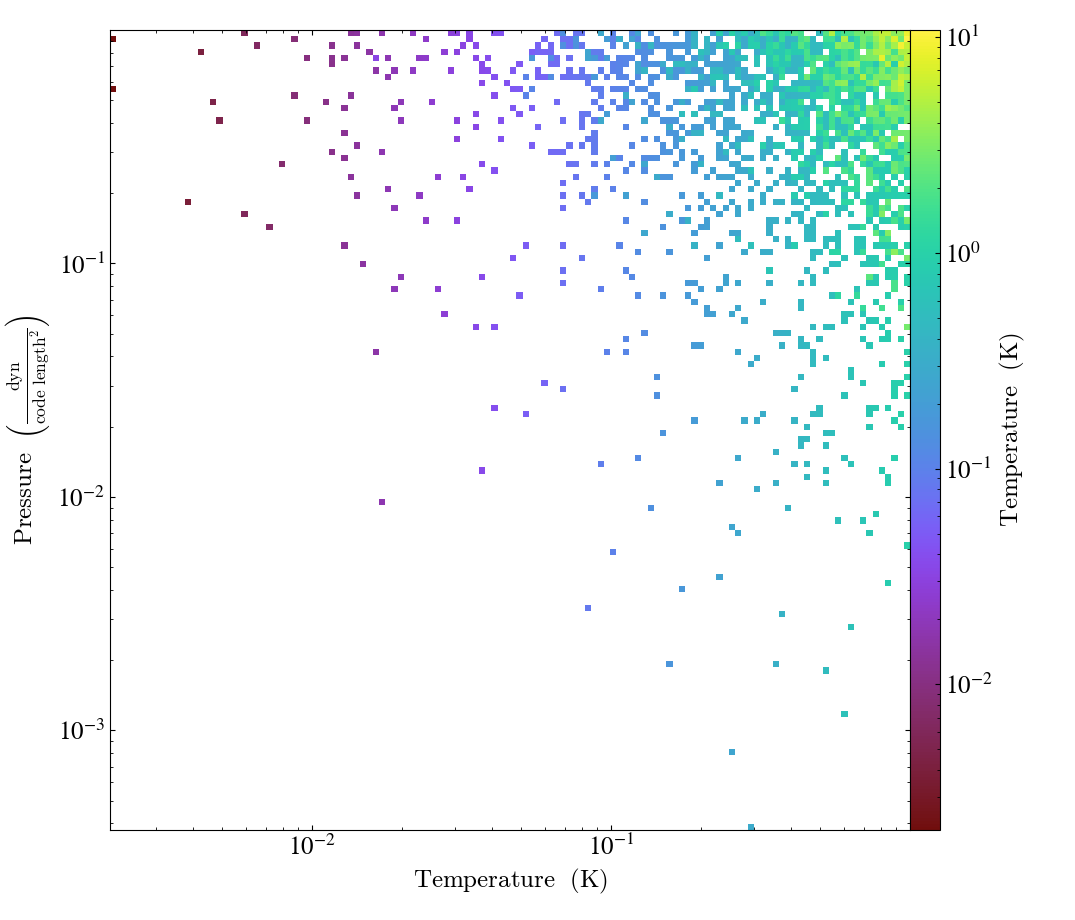

In [5]:
ds.yt.PhasePlot('temperature', 'pressure', 'temperature')

For a full description of plotting in `yt`, see [the yt documentation](https://yt-project.org/doc/visualizing/plots.html). 